In [1]:
""" Inflation Prediction Study
Author: Camilla Nore
Date:   2015-08-30
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#%matplotlib notebook
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.
from inflastudy import decode_column_name # Decode column name

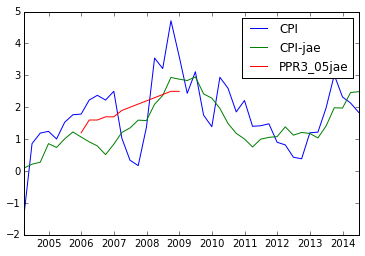

In [2]:
data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')
#print data.raw_data.CPI       # Uncomment this line to see raw CPI data.
#print data.raw_data.columns   # Uncomment this line to see column names.
# Column names wo special characters can be accessed as object members, e.g.: raw_data.CPI
plt.plot(data.raw_data.index, data.raw_data.CPI,label='CPI')
plt.hold(True)
# Column names with special characters need to be accessed by key, e.g.: raw_data['CPI-jae']
plt.plot(data.raw_data.index, data.raw_data['CPI-jae'],    label='CPI-jae')
plt.plot(data.raw_data.index, data.raw_data['PPR3_05jae'], label='PPR3_05jae')
plt.legend()

['PPR3_05jae', 'PPR1_06jae', 'PPR2_06jae', 'PPR3_06jae', 'PPR1_07jae', 'PPR2_07jae', 'PPR3_07jae', 'PPR1_08jae', 'PPR2_08xe', 'PPR3_08xe', 'PPR4_08xe', 'PPR1_09xe', 'PPR2_09xe', 'PPR3_09xe', 'PPR1_10xe', 'PPR2_10xe', 'PPR3_10xe', 'PPR1_11xe', 'PPR2_11xe', 'PPR3_11xe', 'PPR1_12xe', 'PPR2_12xe', 'PPR3_12xe', 'PPR1_13xe', 'PPR2_13xe', 'PPR3_13xe', 'PPR4_13xe', 'PPR1_14xe', 'PPR2_14xe', 'PPR3_14xe', 'PPR4_14xe', 'PPR1_15xe', 'PPR2_15xe', 'CPI-jae']
columns Index([u'PPR3_05folio', u'PPR1_06folio', u'PPR2_06folio', u'PPR3_06folio',
       u'PPR1_07folio', u'PPR2_07folio', u'PPR3_07folio', u'PPR1_08folio',
       u'PPR2_08folio', u'PPR3_08folio', 
       ...
       u'Boligpris Gap mot trend med ensidig HP-filter⁴',
       u'Boligpris Gap mot trend med utvidet HP-filter³',
       u'BoligprisGap mot snitt (rekursivt)',
       u'NæringseiendomGap mot trend ved ensidig HP-filter³',
       u'NæringseiendomGap mot trend ved utvidet HP-filter²',
       u'NæringseiendomGap mot snitt (rekursivt)',
   

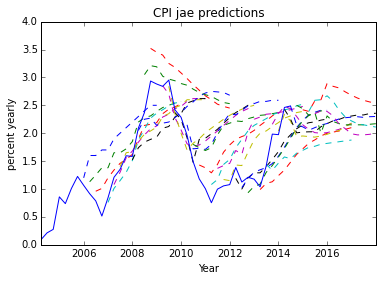

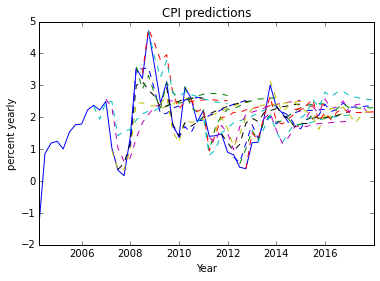

In [3]:
plt.figure('All jae predictions')
plt.title('CPI jae predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
jae_columns = []
for col in data.raw_data.columns:
    if ('xe' in col) or ('jae' in col):
        jae_columns.append(col)
        if 'CPI-jae' in col:
            linestyle ='b-' 
        else : 
            linestyle = '--'
        plt.plot(data.raw_data.index,
                 data.raw_data[col], linestyle,
                 label=col)

print jae_columns
jae_columns.remove('CPI-jae')


cpi_columns = []
plt.figure('CPI predictions')
plt.title('CPI predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
#plt.grid(True)
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],)
         #label ='CPI'
         
print 'columns', data.raw_data.columns
for column_name in data.raw_data.columns:
    #print'col is', cpi
    if ('cpi' in column_name):
        #print 'Found cpi in column:', cpi
        cpi_columns.append(column_name)
        plt.plot(data.raw_data.index,
                 data.raw_data[column_name],'--')
                 #label=column_name)
#plt.legend()        
print 'List of cpi columns:', cpi_columns
    
#for col in data.raw_data.columns:
 #   print col


t
2004-03-31    NaN
2004-06-30    NaN
2004-09-30    NaN
2004-12-31    NaN
2005-03-31    NaN
2005-06-30    NaN
2005-09-30    NaN
2005-12-31    1.2
2006-03-31    1.6
2006-06-30    1.6
2006-09-30    1.7
2006-12-31    1.7
2007-03-31    1.9
2007-06-30    2.0
2007-09-30    2.1
2007-12-31    2.2
2008-03-31    2.3
2008-06-30    2.4
2008-09-30    2.5
2008-12-31    2.5
2009-03-31    NaN
2009-06-30    NaN
2009-09-30    NaN
2009-12-31    NaN
2010-03-31    NaN
2010-06-30    NaN
2010-09-30    NaN
2010-12-31    NaN
2011-03-31    NaN
2011-06-30    NaN
2011-09-30    NaN
2011-12-31    NaN
2012-03-31    NaN
2012-06-30    NaN
2012-09-30    NaN
2012-12-31    NaN
2013-03-31    NaN
2013-06-30    NaN
2013-09-30    NaN
2013-12-31    NaN
2014-03-31    NaN
2014-06-30    NaN
2014-09-30    NaN
2014-12-31    NaN
2015-03-31    NaN
2015-06-30    NaN
2015-09-30    NaN
2015-12-31    NaN
2016-03-31    NaN
2016-06-30    NaN
2016-09-30    NaN
2016-12-31    NaN
2017-03-31    NaN
2017-06-30    NaN
2017-09-30    NaN
2017-12-

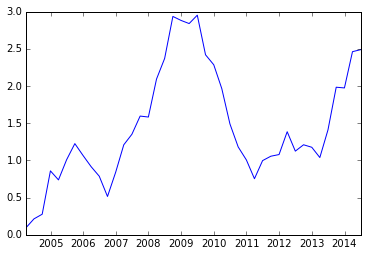

In [4]:
#How to find the vector of predictions one quarter ahead
for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            # This is a start, but def not correct
            # Maybe because the jae columns are not sorted correctly?
            data.raw_data.loc[t, 'firstpred'] = value
            data.raw_data.loc[t, 'firstpred']
        break # stop the loop on the first valid prediction
        
print data.raw_data.firstpred
plt.figure('First prediction')
plt.plot(data.raw_data.index,
        data.raw_data['CPI-jae'])

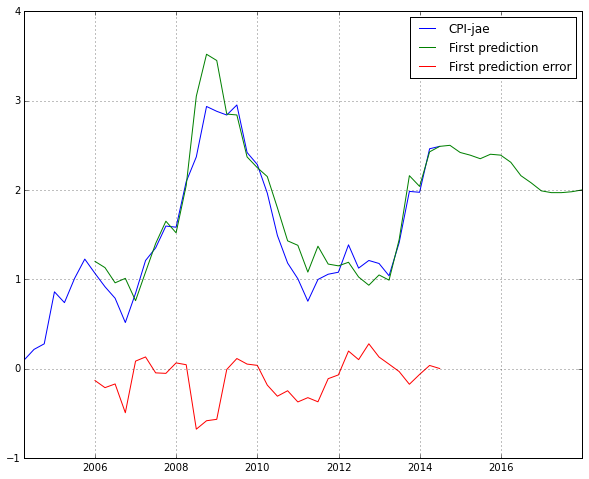

In [5]:
# How to find the vector of predictions one quarter ahead

for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            data.raw_data.loc[t,'firstpred'] = value
            data.raw_data.loc[t,'firstpred_src'] = col
            # Do not stop the loop on the first column, but rather
            # use the last column with a valid number.
            # We have to think a bit on how to get the other predictions
            # with longer horizons, should probably make a list of these.
            # An option is to work on the reverse list of columns, and add 
            # with longer prediction horizons..
            
plt.figure('First prediction',figsize=(10,8))
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label='CPI-jae')
plt.plot(data.raw_data.index,
         data.raw_data.firstpred,
         label='First prediction')
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae']-data.raw_data.firstpred,
         label='First prediction error')
plt.legend()
plt.grid(True)
# Print the plotted data, so it can be verified towards
# the excel source data.
#print data.raw_data.loc[:,['firstpred','firstpred_src']]
# 
# Regn ut square errors på den lista her.

In [6]:
#Regular Expression tools to decode column names

import re
import numpy as np

__ppr_name_regexp = re.compile(
    (r'PPR'                  # Start with PPR
     r'(?P<quarter>\d)'      # Look for single digit quarter
     r'_'                    # seperated by an underscore
     r'(?P<year>\d\d)'       # followed by two-digit year
     r'(?P<description>.*)'  # and the description tag.
     ))
""" The regular expression for this tool. We do not want others outside to use
this regular expression. So we make it private by starting the name with __.
"""


def decode(column_name):
    """ Internal method for InflaData to get year, quarter and description
        from the column names in the input dataset.
    """
    match = __ppr_name_regexp.match(column_name)
    if not match:
        return None
    dictionary = match.groupdict()
    return dictionary

In [7]:
example = decode('PPR1_11jae')
print example
print example['year']
print example['quarter']

{'quarter': '1', 'description': 'jae', 'year': '11'}
11
1


In [8]:
# Move decode column name to a module 
column_name = 'PPR3_11jae'
decode_example = decode_column_name.decode(column_name)
print column_name, 'gets decoded to: ', decode_example

PPR3_11jae gets decoded to:  {'quarter': '3', 'description': 'jae', 'year': '11'}


In [9]:
#Selecting the CPI-jae columns from the rawdata
# Since we already have a list of the interesting columns, this is _easy_.

cpi_jae_data = data.raw_data.loc[:, jae_columns]
print cpi_jae_data; #prints the dataset with columns containing jae or xe


            PPR3_05jae  PPR1_06jae  PPR2_06jae  PPR3_06jae  PPR1_07jae  \
t                                                                        
2004-03-31         NaN         NaN         NaN         NaN         NaN   
2004-06-30         NaN         NaN         NaN         NaN         NaN   
2004-09-30         NaN         NaN         NaN         NaN         NaN   
2004-12-31         NaN         NaN         NaN         NaN         NaN   
2005-03-31         NaN         NaN         NaN         NaN         NaN   
2005-06-30         NaN         NaN         NaN         NaN         NaN   
2005-09-30         NaN         NaN         NaN         NaN         NaN   
2005-12-31         1.2         NaN         NaN         NaN         NaN   
2006-03-31         1.6        1.13         NaN         NaN         NaN   
2006-06-30         1.6        1.25        0.96         NaN         NaN   
2006-09-30         1.7        1.38        1.01         NaN         NaN   
2006-12-31         1.7        1.38    

In [10]:
# Test datetime

print 'Trygve er:', np.datetime64('2015') - np.datetime64('1985')
today = np.datetime64('2015-09-04')
trygve = np.datetime64('1985-08-07')
camilla = np.datetime64('1987-11-09')
print 'Trygve er:', today - trygve
print 'Camilla er:', today - camilla
print 'Trygve er', camilla - trygve, 'eldre enn Camilla.'
dt = pd.Timedelta(camilla-trygve)
dt_quarters = int(round(dt.days / (365.2425 / 4)))
print 'Trygve er', dt_quarters, 'quarters eldre enn Camilla.'
print 'Pandas index er: ', data.raw_data.index.dtype
print 'Trygve er: ', np.datetime64('2015') - np.datetime64('1985')
print 'Camilla er:', np.datetime64('2015') - np.datetime64('1987')
print 'Camilla er ikke 28 år men 27. Vil ha svar i år'
print 'Camilla er', np.datetime64('2015-09','Y') - np.datetime64('1987-11','Y') 
# print 'Trygve er ', dt_years, 'years eldre enn Camilla'

print data.raw_data.index.dtype


camilla_age = pd.Timedelta(today - camilla)
dt_years = int(np.floor(camilla_age.days / (365.2425)))
print 'Camilla er ', dt_years, 'years old.'



Trygve er: 30 years
Trygve er: 10985 days
Camilla er: 10161 days
Trygve er 824 days eldre enn Camilla.
Trygve er 9 quarters eldre enn Camilla.
Pandas index er:  datetime64[ns]
Trygve er:  30 years
Camilla er: 28 years
Camilla er ikke 28 år men 27. Vil ha svar i år
Camilla er 28 years
datetime64[ns]
Camilla er  27 years old.


In [11]:
from inflastudy import time_tools
trygve = np.datetime64('1985-08-07')
camilla = np.datetime64('1987-11-09')
dt = time_tools.time_diff_in_quarters(trygve, camilla)
print 'Trygve er', dt, 'quarters eldre enn Camilla.'

Trygve er 9 quarters eldre enn Camilla.


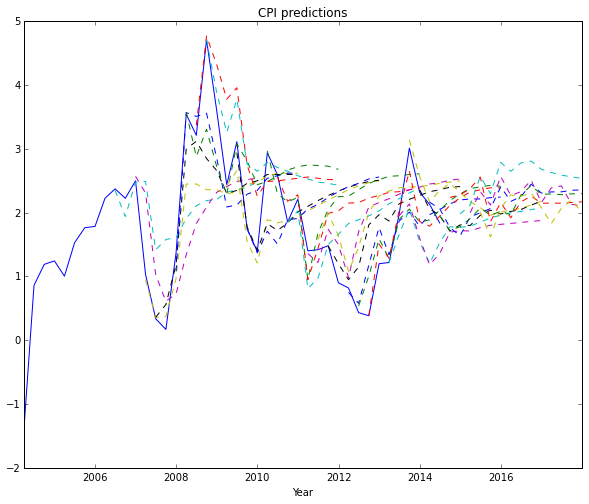

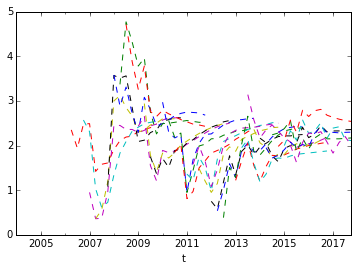

In [12]:
# Plot all CPI predictions and the actual CPI.

plt.figure('CPI predictions', figsize=(10,8))  # Larger plot.
plt.title('CPI predictions')
plt.xlabel('Year')
# Plot the actual CPI as a solid line.
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],
         label ='CPI')

for col_name in data.cpi_predictions:
    plt.plot(data.cpi_predictions.index,
             data.cpi_predictions[col_name],
             '--',
             label = 'col_name')
data.cpi_predictions.plot(legend=False, style='--')

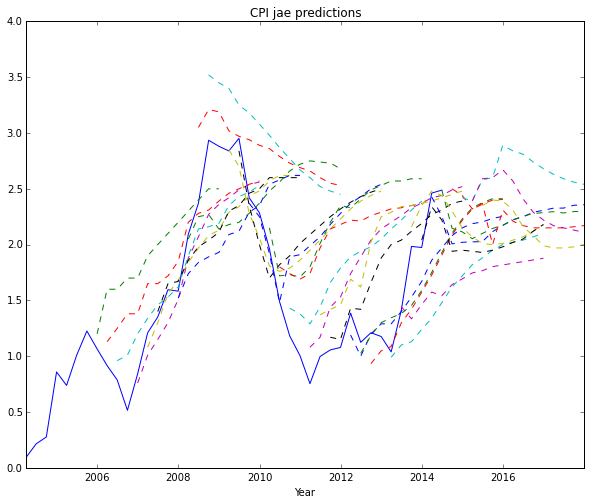

In [14]:
# Plot all CPI jae predictions and the actual CPI jae.
plt.figure('CPI jae predictions', figsize=(10,8))  # Larger plot.
plt.title('CPI jae predictions')
plt.xlabel('Year')

# Plot the actual CPI as a solid line.
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label ='CPI jae')

for col_name in data.cpi_jae_predictions:
    plt.plot(data.cpi_jae_predictions.index,
             data.cpi_jae_predictions[col_name],
             '--',
             label = 'col_name')



In [ ]:
# Test the InflaData class

import numpy as np
import nose.tools
from inflastudy import InflaData
k_first_t_in_data = '2006-03-31'
k_test_data = 'tests/test_data_input.csv'


def test_init():
    """ Test creating an empty object"""
    data = InflaData.InflaData()
    assert data is not None


def test_init_with_data():
    """ Test loading data_file. """
    data = InflaData.InflaData(k_test_data)
    # Verify that the first line of data is read correctly.
    nose.tools.eq_(data.raw_data.index[0],
                   np.datetime64(k_first_t_in_data),
                   'First line date does not match')
    print 'Successfully loaded test data: \n', data.raw_data
